In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#wyświetl wszystkie wiersze i kolumny
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [11]:
df = pd.read_csv('pm25.csv',index_col = 0, header = 0)
df.head()

,Rok,Miesiąc,Dzień,Godzina,Wysokość_podstawy_niższej_[m],Wysokość_podstawy_wyższej_[m],Widzialność_operatora_[m],Widzialność_automat_[m],Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Poryw_wiatru_[m/s],Temperatura_powietrza_[°C],Temperatura_termometru_zwilżonego_[°C],Ciśnienie_pary_wodnej_[hPa],Wilgotność_względna_[%],Temperatura_punktu_rosy_[°C],Ciśnienie_na_pozimie_stacji_[hPa],Ciśnienie_na_pozimie_morza_[hPa],Wartość_tendencji_[wartość],Opad_za_6_godzin_[mm],Status_pomiaru_WO6G,Status_pomiaru_ROPT,Zachmurzenie_niskie_[oktanty],Niedosyt_wilgotności_[hPa},Usłonecznienie,Poryw_maksymalny_za_okres_WW_[m/s],Temperatura_gruntu_-5_[°C],Temperatura_gruntu_-10_[°C],Temperatura_gruntu_-20_[°C],Temperatura_gruntu_-50_[°C],Temperatura_gruntu_-100_[°C],Status_pomiaru_TG100,Temperatura_minimalna_za_12_godzin_[°C],Status_pomiaru_TMIN,Temperatura_maksymalna_za_12_godzin_[°C],Status_pomiaru_TMAX,Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C],Status_pomiaru_TGMI,Równoważnik_wodny_śniegu_[mm/cm],Status_pomiaru_RWSN,Wysokość_pokrywy_śnieżnej_[cm],Status_pomiaru_PKSN,Wysokość_świeżo_spadłego_śniegu_[cm],Wysokość_śniegu_na_poletku_[cm],Wysokość_próbki_[cm],Ciężar_próbki_[g],Niepodległości,dzien_tygodnia,pm25lag
2014-01-01 01:00:00,2014.0,1.0,1.0,1.0,210.0,0.0,7000.0,0.0,8.0,119.0,4.0,0.0,1.0,0.0,6.1,93.0,0.0,1009.5,1023.0,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,100.325798,3,100.325798
2014-01-01 02:00:00,2014.0,1.0,1.0,2.0,210.0,0.0,7000.0,0.0,8.0,128.0,4.0,0.0,1.2,0.0,6.1,92.0,0.0,1009.0,1022.5,-1.0,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,69.412430,3,100.325798
2014-01-01 03:00:00,2014.0,1.0,1.0,3.0,210.0,0.0,7000.0,0.0,8.0,134.0,3.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.6,1022.1,-1.2,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,40.967861,3,69.412430
2014-01-01 04:00:00,2014.0,1.0,1.0,4.0,210.0,0.0,7000.0,0.0,8.0,129.0,4.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.2,1021.7,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,37.308937,3,40.967861
2014-01-01 05:00:00,2014.0,1.0,1.0,5.0,210.0,0.0,7000.0,0.0,8.0,137.0,4.0,0.0,1.3,0.0,6.1,91.0,0.0,1008.2,1021.7,-0.8,0.0,8.0,8.0,7.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,38.185955,3,37.308937


# EDA

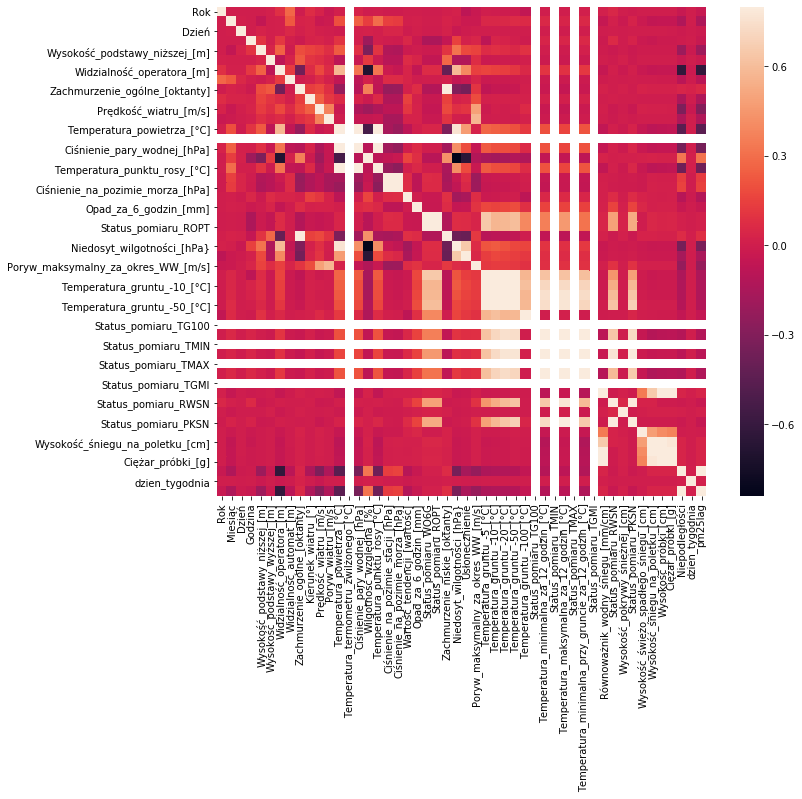

In [12]:
#Korelogram
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

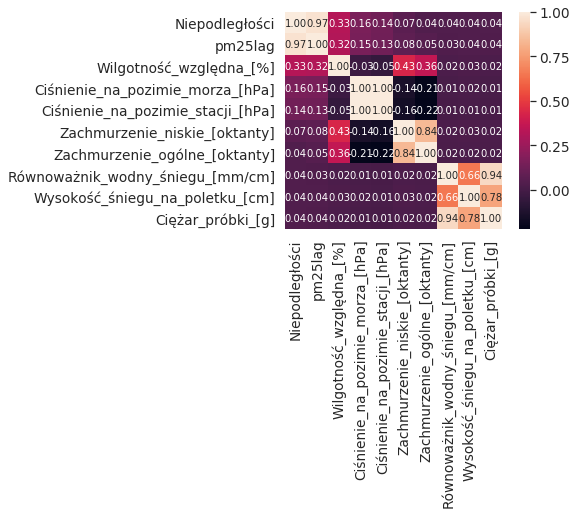

In [13]:
#9 najmocniej skorelowanych zmiennych ze zmienną objaśnianą
k = 10 #liczba zmiennych 
col = corrmat.nlargest(k, 'Niepodległości')['Niepodległości'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [0]:
#Podział zbioru na zmienne objaśniające i zmienną objaśnianą

y = df['Niepodległości']
X = df.drop('Niepodległości', axis = 1)

In [15]:
print(y.shape)
print(X.shape)

(43824,)
(43824, 49)


In [16]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Zmienna objaśniania

In [17]:
#Podstawowe statystyki 
y.describe()

count    43824.000000
mean        26.164206
std         17.567092
min          0.832811
25%         13.588240
50%         21.513400
75%         33.546879
max        187.930147
Name: Niepodległości, dtype: float64

In [18]:
#Sprawdzenie braków w danych
y.isnull().sum()

0

In [19]:
#Sprawdzenie występowania wartości NaN
y.isna().sum()

0

In [20]:
'''
Sprawdzenie występownia wartości '-inf'
False oznacza, że występują
'''
np.all(np.isfinite(y))

True

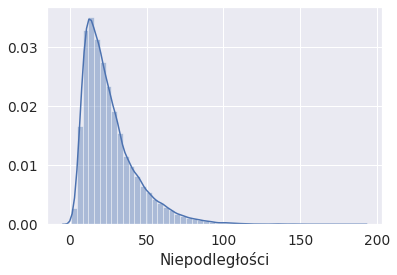

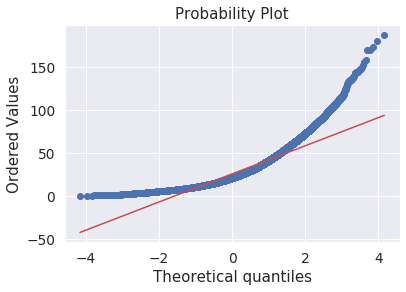

In [21]:
#Weryfikacja normalności zmiennej objaśnianej
sns.distplot(y)
fig = plt.figure()
qq = stats.probplot(df['Niepodległości'], plot=plt)

In [0]:
#Transformacja logarytmiczna
y = np.log(y)

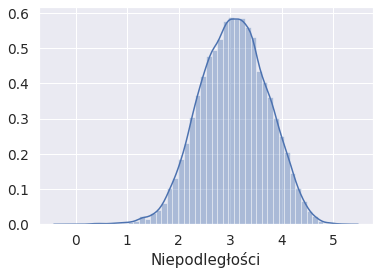

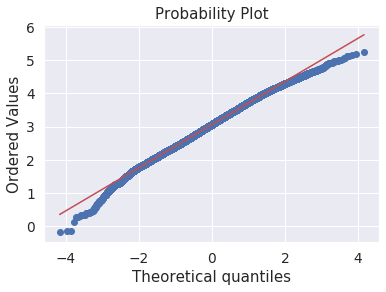

In [23]:
#Ponowna weryfikacja normalności
sns.distplot(y)
fig = plt.figure()
qq = stats.probplot(y, plot=plt)

### Zmienne objaśniające

In [24]:
X.isna().sum()

Rok                                                     0
Miesiąc                                                 0
Dzień                                                   0
Godzina                                                 0
Wysokość_podstawy_niższej_[m]                           0
Wysokość_podstawy_wyższej_[m]                           0
Widzialność_operatora_[m]                               0
Widzialność_automat_[m]                                 0
Zachmurzenie_ogólne_[oktanty]                           0
Kierunek_wiatru_[°]                                     0
Prędkość_wiatru_[m/s]                                   0
Poryw_wiatru_[m/s]                                      0
Temperatura_powietrza_[°C]                              0
Temperatura_termometru_zwilżonego_[°C]                  0
Ciśnienie_pary_wodnej_[hPa]                             0
Wilgotność_względna_[%]                                 0
Temperatura_punktu_rosy_[°C]                            0
Ciśnienie_na_p

In [0]:
#usunięcie kolumn z nazwą Status
cols = [c for c in X.columns if c.lower()[:6] == 'status']
X.drop(cols, axis = 1, inplace = True)

# standaryzacja

In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
new_X = scaler.fit_transform(X) 

In [27]:
new_X

array([[-1.41464132, -1.60211641, -1.67418785, ..., -0.04152038,
        -0.50046355,  4.22071702],
       [-1.41464132, -1.60211641, -1.67418785, ..., -0.04152038,
        -0.50046355,  4.22071702],
       [-1.41464132, -1.60211641, -1.67418785, ..., -0.04152038,
        -0.50046355,  2.46132273],
       ...,
       [ 1.41457676,  1.58802078,  1.73559253, ..., -0.04152038,
        -1.50045511, -0.45447113],
       [ 1.41457676,  1.58802078,  1.73559253, ..., -0.04152038,
        -1.50045511, -0.43373826],
       [ 1.41457676,  1.58802078,  1.73559253, ..., -0.04152038,
        -1.50045511, -0.01908129]])

In [0]:
#podgląd co znajduje się w danych
XX = pd.DataFrame(data=new_X, columns=X.columns.values)
XX.head()

,Rok,Miesiąc,Dzień,Godzina,Wysokość_podstawy_niższej_[m],Wysokość_podstawy_wyższej_[m],Widzialność_operatora_[m],Widzialność_automat_[m],Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Poryw_wiatru_[m/s],Temperatura_powietrza_[°C],Temperatura_termometru_zwilżonego_[°C],Ciśnienie_pary_wodnej_[hPa],Wilgotność_względna_[%],Temperatura_punktu_rosy_[°C],Ciśnienie_na_pozimie_stacji_[hPa],Ciśnienie_na_pozimie_morza_[hPa],Wartość_tendencji_[wartość],Opad_za_6_godzin_[mm],Zachmurzenie_niskie_[oktanty],Niedosyt_wilgotności_[hPa},Usłonecznienie,Poryw_maksymalny_za_okres_WW_[m/s],Temperatura_gruntu_-5_[°C],Temperatura_gruntu_-10_[°C],Temperatura_gruntu_-20_[°C],Temperatura_gruntu_-50_[°C],Temperatura_gruntu_-100_[°C],Temperatura_minimalna_za_12_godzin_[°C],Temperatura_maksymalna_za_12_godzin_[°C],Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C],Równoważnik_wodny_śniegu_[mm/cm],Wysokość_pokrywy_śnieżnej_[cm],Wysokość_świeżo_spadłego_śniegu_[cm],Wysokość_śniegu_na_poletku_[cm],Wysokość_próbki_[cm],Ciężar_próbki_[g],dzien_tygodnia,pm25lag
0,-1.414641,-1.602116,-1.674188,-1.517287,-0.522323,-0.327889,-1.209181,-0.194829,1.051648,-0.613848,0.299607,-0.188347,-0.999276,0.0,-0.799490,1.026491,-0.701489,0.700922,0.748951,-1.146657,-0.094946,1.075239,-0.728603,-0.56485,-0.364334,-0.3228,-0.287184,-0.296941,-0.316738,-0.210445,-0.193591,-0.236175,-0.171935,-0.04209,-0.020762,-0.030016,-0.047215,-0.040403,-0.04152,-0.500464,4.220717
1,-1.414641,-1.602116,-1.674188,-1.372805,-0.522323,-0.327889,-1.209181,-0.194829,1.051648,-0.521895,0.299607,-0.188347,-0.977065,0.0,-0.799490,0.970330,-0.701489,0.640823,0.690192,-0.882094,-0.094946,1.075239,-0.728603,-0.56485,-0.364334,-0.3228,-0.287184,-0.296941,-0.316738,-0.210445,-0.193591,-0.236175,-0.171935,-0.04209,-0.020762,-0.030016,-0.047215,-0.040403,-0.04152,-0.500464,4.220717
2,-1.414641,-1.602116,-1.674188,-1.228324,-0.522323,-0.327889,-1.209181,-0.194829,1.051648,-0.460593,-0.199898,-0.188347,-0.965960,0.0,-0.777859,0.970330,-0.687852,0.592744,0.643185,-1.058470,-0.094946,1.075239,-0.728603,-0.56485,-0.364334,-0.3228,-0.287184,-0.296941,-0.316738,-0.210445,-0.193591,-0.236175,-0.171935,-0.04209,-0.020762,-0.030016,-0.047215,-0.040403,-0.04152,-0.500464,2.461323
3,-1.414641,-1.602116,-1.674188,-1.083843,-0.522323,-0.327889,-1.209181,-0.194829,1.051648,-0.511678,0.299607,-0.188347,-0.965960,0.0,-0.777859,0.970330,-0.687852,0.544665,0.596177,-1.146657,-0.094946,1.075239,-0.728603,-0.56485,-0.364334,-0.3228,-0.287184,-0.296941,-0.316738,-0.210445,-0.193591,-0.236175,-0.171935,-0.04209,-0.020762,-0.030016,-0.047215,-0.040403,-0.04152,-0.500464,0.842437
4,-1.414641,-1.602116,-1.674188,-0.939362,-0.522323,-0.327889,-1.209181,-0.194829,1.051648,-0.429942,0.299607,-0.188347,-0.965960,0.0,-0.799490,0.914170,-0.701489,0.544665,0.596177,-0.705719,-0.094946,1.075239,-0.710491,-0.56485,-0.364334,-0.3228,-0.287184,-0.296941,-0.316738,-0.210445,-0.193591,-0.236175,-0.171935,-0.04209,-0.020762,-0.030016,-0.047215,-0.040403,-0.04152,-0.500464,0.634194


# Modelowanie

### podstawa

In [0]:
#podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.7, random_state = 123)

In [29]:
#Rozmiar zbiorów
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13147, 41)
(30677, 41)
(13147,)
(30677,)


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from math import sqrt
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [0]:
#Zdefiniowanie funkcji do oceny modelu 1
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
#Zdefiniowanie funkcji do oceny modelu 2
n_folds = 5

def scoring_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    r2= cross_val_score(model, X_train, y_train, scoring="r2", cv = kf)
    return(rmse, r2)

### Zdefiniowanie podstawowych modeli

In [0]:
#LASSO Regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [0]:
#Elastic Net Regression 

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [0]:
#Kernel Ridge Regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [0]:
#Gradient Boosting Regression

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
#XGBoost Regression

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [0]:
#LightGBM

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
#Linear Regression

model_lr = LinearRegression()

In [0]:
#SVR

model_svr = SVR()

In [0]:
#KNN Regression
#Poniżej analiza optymalnej wartości k

model_knn = neighbors.KNeighborsRegressor(n_neighbors = 4, algorithm='auto')

In [0]:
#KNN Regression - analiza parametru k

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] 

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)
 

RMSE value for k=  1 is: 0.3650345109898078
RMSE value for k=  2 is: 0.3321569957935131
RMSE value for k=  3 is: 0.32371887103211877
RMSE value for k=  4 is: 0.32014656178211615
RMSE value for k=  5 is: 0.319401533886522
RMSE value for k=  6 is: 0.31912422433264587
RMSE value for k=  7 is: 0.31942376631387226
RMSE value for k=  8 is: 0.3195723812926971
RMSE value for k=  9 is: 0.3205072434945047
RMSE value for k=  10 is: 0.32158576281137935
RMSE value for k=  11 is: 0.3228247197118714
RMSE value for k=  12 is: 0.32358012811022363
RMSE value for k=  13 is: 0.32444152441685054
RMSE value for k=  14 is: 0.3255014371883855
RMSE value for k=  15 is: 0.32638113543448494
RMSE value for k=  16 is: 0.32741824279542714
RMSE value for k=  17 is: 0.32817373360627183
RMSE value for k=  18 is: 0.32907211589080193
RMSE value for k=  19 is: 0.32982435614020555
RMSE value for k=  20 is: 0.3307291933716142


### Ocena wyników podstawowych modeli

In [0]:
#LASSO Regression

score = scoring_cv(lasso)
print("Lasso rmse: {:.4f} ({:.4f}), r2: {:.2f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Lasso rmse: 0.2659 (0.0036), r2: 83.03%



In [0]:
#Elastic Net Regression 

score = scoring_cv(ENet)
print("ElasticNet rmse: {:.4f} ({:.4f}), r2: {:.2f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

ElasticNet rmse: 0.2657 (0.0036), r2: 83.06%



In [0]:
#Kernel Ridge Regression 

score = scoring_cv(KRR)
print("Kernel Ridge rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Kernel Ridge rmse: 0.1960 (0.0058), r2: 90.8%



In [0]:
#Gradient Boosting Regression 

score = scoring_cv(GBoost)
print("Gradient Boosting rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Gradient Boosting rmse: 0.1647 (0.0038), r2: 93.5%



In [0]:
#XGBoost Regression 

score = scoring_cv(model_xgb)
print("Xgboost rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Xgboost rmse: 0.1631 (0.0034), r2: 93.6%



In [0]:
#LightGBM 

score = scoring_cv(model_lgb)
print("LGBM rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

LGBM rmse: 0.1691 (0.0034), r2: 93.1%



In [0]:
#Linear Regression

score = scoring_cv(model_lr)
print("LR rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

LR rmse: 0.2639 (0.0039), r2: 83.3%



In [0]:
#SVR

score = scoring_cv(model_svr)
print("SVR rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

SVR rmse: 0.1973 (0.0078), r2: 90.7%



In [0]:
#KNN Regression

score = scoring_cv(model_knn)
print("KNN rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

KNN rmse: 0.3240 (0.0061), r2: 74.8%



## Automated Stacking

In [0]:
#pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19879 sha256=9db54fa0b00951d4cbeeee0fda9d1dcd5742306aee4dcadc14845fad96ca15b3
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [0]:
from vecstack import stacking #najpierw trzeba zainstalować: pip install vestack

models = (GBoost,
         model_xgb,
         model_lgb)

In [0]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric= mean_squared_log_error, 
    
                           n_folds=3, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [regression]
metric:       [mean_squared_log_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.00224940]
    fold  1:  [0.00211531]
    fold  2:  [0.00194871]
    ----
    MEAN:     [0.00210447] + [0.00012300]
    FULL:     [0.00210448]

model  1:     [XGBRegressor]
    fold  0:  [0.00224663]
    fold  1:  [0.00201397]
    fold  2:  [0.00189741]
    ----
    MEAN:     [0.00205267] + [0.00014517]
    FULL:     [0.00205268]

model  2:     [LGBMRegressor]
    fold  0:  [0.00249596]
    fold  1:  [0.00230639]
    fold  2:  [0.00216677]
    ----
    MEAN:     [0.00232304] + [0.00013490]
    FULL:     [0.00232305]



In [0]:
model = GBoost
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)

print('RMSE :', mean_squared_error(y_test, y_pred)) 

RMSE : 0.027309842680238658


## Artificial Neural Network

In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5376      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 170,241
Trainable params: 170,241
Non-trainable params: 0
_________________________________________________________________


In [0]:

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)




Train on 10517 samples, validate on 2630 samples
Epoch 1/500





10517/10517 [==============================] - 11s 1ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - val_loss: 0.2024 - val_mean_absolute_error: 0.2024

Epoch 00001: val_loss improved from inf to 0.20244, saving model to Weights-001--0.20244.hdf5
Epoch 2/500
10517/10517 [==============================] - 1s 128us/step - loss: 0.1877 - mean_absolute_error: 0.1877 - val_loss: 0.1620 - val_mean_absolute_error: 0.1620

Epoch 00002: val_loss improved from 0.20244 to 0.16202, saving model to Weights-002--0.16202.hdf5
Epoch 3/500
10517/10517 [==============================] - 1s 127us/step - loss: 0.1618 - mean_absolute_error: 0.1618 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413

Epoch 00003: val_loss improved from 0.16202 to 0.14134, saving model to Weights-003--0.14134.hdf5
Epoch 4/500
10517/10517 [==============================] - 1s 131us/step - loss: 0.1457 - mean_absolute_error: 0.1457 - val_loss: 0.1430 -

In [0]:
predictions = NN_model.predict(X_test)

In [0]:
print('RMSE :', mean_squared_error(y_test, predictions))

RMSE : 0.04091814942057595


# modele

In [0]:
lasso.fit(X_train, y_train)
ENet.fit(X_train, y_train)
KRR.fit(X_train, y_train)
GBoost.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_lgb.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_svr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [33]:
model_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

# ważność cech

In [0]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X_train.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

In [0]:
feats = X.columns.values

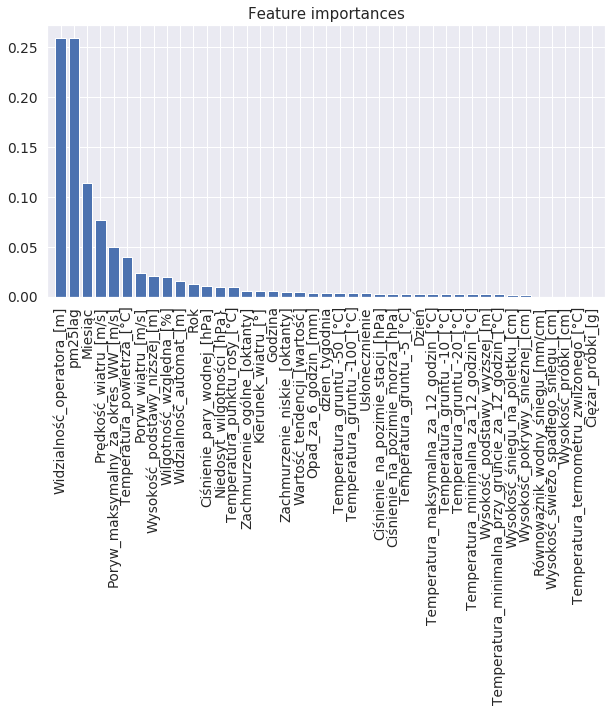

In [0]:
draw_feature_importances(model_xgb, feats)

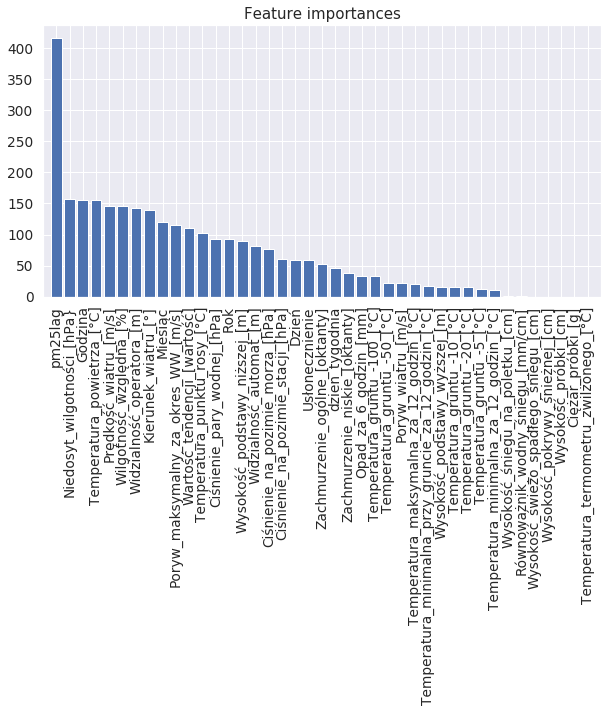

In [0]:
draw_feature_importances(model_lgb, feats)

# eli5

In [37]:
pip install eli5

     |████████████████████████████████| 112kB 3.5MB/s 


In [38]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances

Using TensorFlow backend.


In [0]:
perm = PermutationImportance(lasso).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.1483 ± 0.0139,pm25lag
0.2147 ± 0.0022,Temperatura_powietrza_[°C]
0.0862 ± 0.0012,Temperatura_punktu_rosy_[°C]
0.0771 ± 0.0012,Wilgotność_względna_[%]
0.0405 ± 0.0008,Widzialność_operatora_[m]
0.0256 ± 0.0007,Ciśnienie_pary_wodnej_[hPa]
0.0172 ± 0.0008,Niedosyt_wilgotności_[hPa}
0.0084 ± 0.0005,Temperatura_maksymalna_za_12_godzin_[°C]
0.0079 ± 0.0008,Prędkość_wiatru_[m/s]
0.0062 ± 0.0005,Godzina


In [0]:
perm = PermutationImportance(ENet).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.1455 ± 0.0079,pm25lag
0.2970 ± 0.0045,Temperatura_powietrza_[°C]
0.1331 ± 0.0022,Temperatura_punktu_rosy_[°C]
0.0975 ± 0.0019,Wilgotność_względna_[%]
0.0423 ± 0.0011,Widzialność_operatora_[m]
0.0246 ± 0.0009,Ciśnienie_pary_wodnej_[hPa]
0.0151 ± 0.0006,Niedosyt_wilgotności_[hPa}
0.0083 ± 0.0002,Temperatura_maksymalna_za_12_godzin_[°C]
0.0081 ± 0.0004,Prędkość_wiatru_[m/s]
0.0063 ± 0.0004,Godzina


In [0]:
perm = PermutationImportance(KRR).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.6008 ± 0.0148,pm25lag
0.0412 ± 0.0010,Temperatura_gruntu_-20_[°C]
0.0298 ± 0.0008,Niedosyt_wilgotności_[hPa}
0.0227 ± 0.0004,Temperatura_gruntu_-10_[°C]
0.0173 ± 0.0008,Ciśnienie_pary_wodnej_[hPa]
0.0140 ± 0.0009,Widzialność_operatora_[m]
0.0097 ± 0.0001,Temperatura_gruntu_-50_[°C]
0.0090 ± 0.0007,Godzina
0.0089 ± 0.0002,Temperatura_powietrza_[°C]
0.0086 ± 0.0004,Prędkość_wiatru_[m/s]


In [0]:
perm = PermutationImportance(GBoost).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.2392 ± 0.0119,pm25lag
0.0222 ± 0.0007,Widzialność_operatora_[m]
0.0132 ± 0.0003,Miesiąc
0.0069 ± 0.0005,Godzina
0.0062 ± 0.0002,Prędkość_wiatru_[m/s]
0.0040 ± 0.0003,Wilgotność_względna_[%]
0.0033 ± 0.0001,Niedosyt_wilgotności_[hPa}
0.0028 ± 0.0002,Rok
0.0027 ± 0.0001,Temperatura_powietrza_[°C]
0.0018 ± 0.0002,Kierunek_wiatru_[°]


In [0]:
perm = PermutationImportance(model_xgb).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.3118 ± 0.0107,pm25lag
0.0246 ± 0.0005,Widzialność_operatora_[m]
0.0168 ± 0.0011,Miesiąc
0.0069 ± 0.0003,Godzina
0.0061 ± 0.0004,Prędkość_wiatru_[m/s]
0.0036 ± 0.0003,Niedosyt_wilgotności_[hPa}
0.0029 ± 0.0001,Wilgotność_względna_[%]
0.0029 ± 0.0003,Rok
0.0019 ± 0.0003,Temperatura_powietrza_[°C]
0.0015 ± 0.0001,Wysokość_podstawy_niższej_[m]


In [0]:
perm = PermutationImportance(model_lgb).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.1942 ± 0.0156,pm25lag
0.0331 ± 0.0001,Widzialność_operatora_[m]
0.0172 ± 0.0005,Miesiąc
0.0065 ± 0.0003,Prędkość_wiatru_[m/s]
0.0056 ± 0.0002,Godzina
0.0033 ± 0.0002,Wilgotność_względna_[%]
0.0032 ± 0.0002,Niedosyt_wilgotności_[hPa}
0.0022 ± 0.0001,Temperatura_powietrza_[°C]
0.0020 ± 0.0002,Rok
0.0014 ± 0.0001,Poryw_maksymalny_za_okres_WW_[m/s]


In [0]:
perm = PermutationImportance(model_lr).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
9.6357 ± 0.0831,Ciśnienie_na_pozimie_morza_[hPa]
9.4008 ± 0.1429,Ciśnienie_na_pozimie_stacji_[hPa]
2.4470 ± 0.0380,Temperatura_powietrza_[°C]
1.9115 ± 0.0228,Temperatura_punktu_rosy_[°C]
1.1021 ± 0.0190,pm25lag
0.5929 ± 0.0053,Wilgotność_względna_[%]
0.0638 ± 0.0015,Widzialność_operatora_[m]
0.0445 ± 0.0010,Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C]
0.0404 ± 0.0005,Temperatura_minimalna_za_12_godzin_[°C]
0.0399 ± 0.0015,Temperatura_gruntu_-50_[°C]


In [0]:
perm = PermutationImportance(model_svr).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
1.2956 ± 0.0125,pm25lag
0.0209 ± 0.0012,Widzialność_operatora_[m]
0.0171 ± 0.0006,Temperatura_gruntu_-50_[°C]
0.0124 ± 0.0007,Prędkość_wiatru_[m/s]
0.0123 ± 0.0004,Niedosyt_wilgotności_[hPa}
0.0122 ± 0.0005,Temperatura_gruntu_-10_[°C]
0.0115 ± 0.0003,Temperatura_gruntu_-100_[°C]
0.0106 ± 0.0006,Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C]
0.0102 ± 0.0007,Temperatura_gruntu_-20_[°C]
0.0099 ± 0.0015,Temperatura_minimalna_za_12_godzin_[°C]


In [39]:
perm = PermutationImportance(model_knn).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feats, top=50)

Weight,Feature
0.2973 ± 0.0046,pm25lag
0.0573 ± 0.0029,Widzialność_operatora_[m]
0.0295 ± 0.0030,Widzialność_automat_[m]
0.0265 ± 0.0016,Prędkość_wiatru_[m/s]
0.0229 ± 0.0017,Dzień
0.0217 ± 0.0023,Rok
0.0206 ± 0.0012,Kierunek_wiatru_[°]
0.0202 ± 0.0013,dzien_tygodnia
0.0183 ± 0.0027,Wartość_tendencji_[wartość]
0.0162 ± 0.0024,Miesiąc
